In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\YOUNESS\AppData\Local\Temp\ipykernel_12296\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
chomage_usa = pd.read_csv('UNRATE.csv')
chomage_usa.head(5)

,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


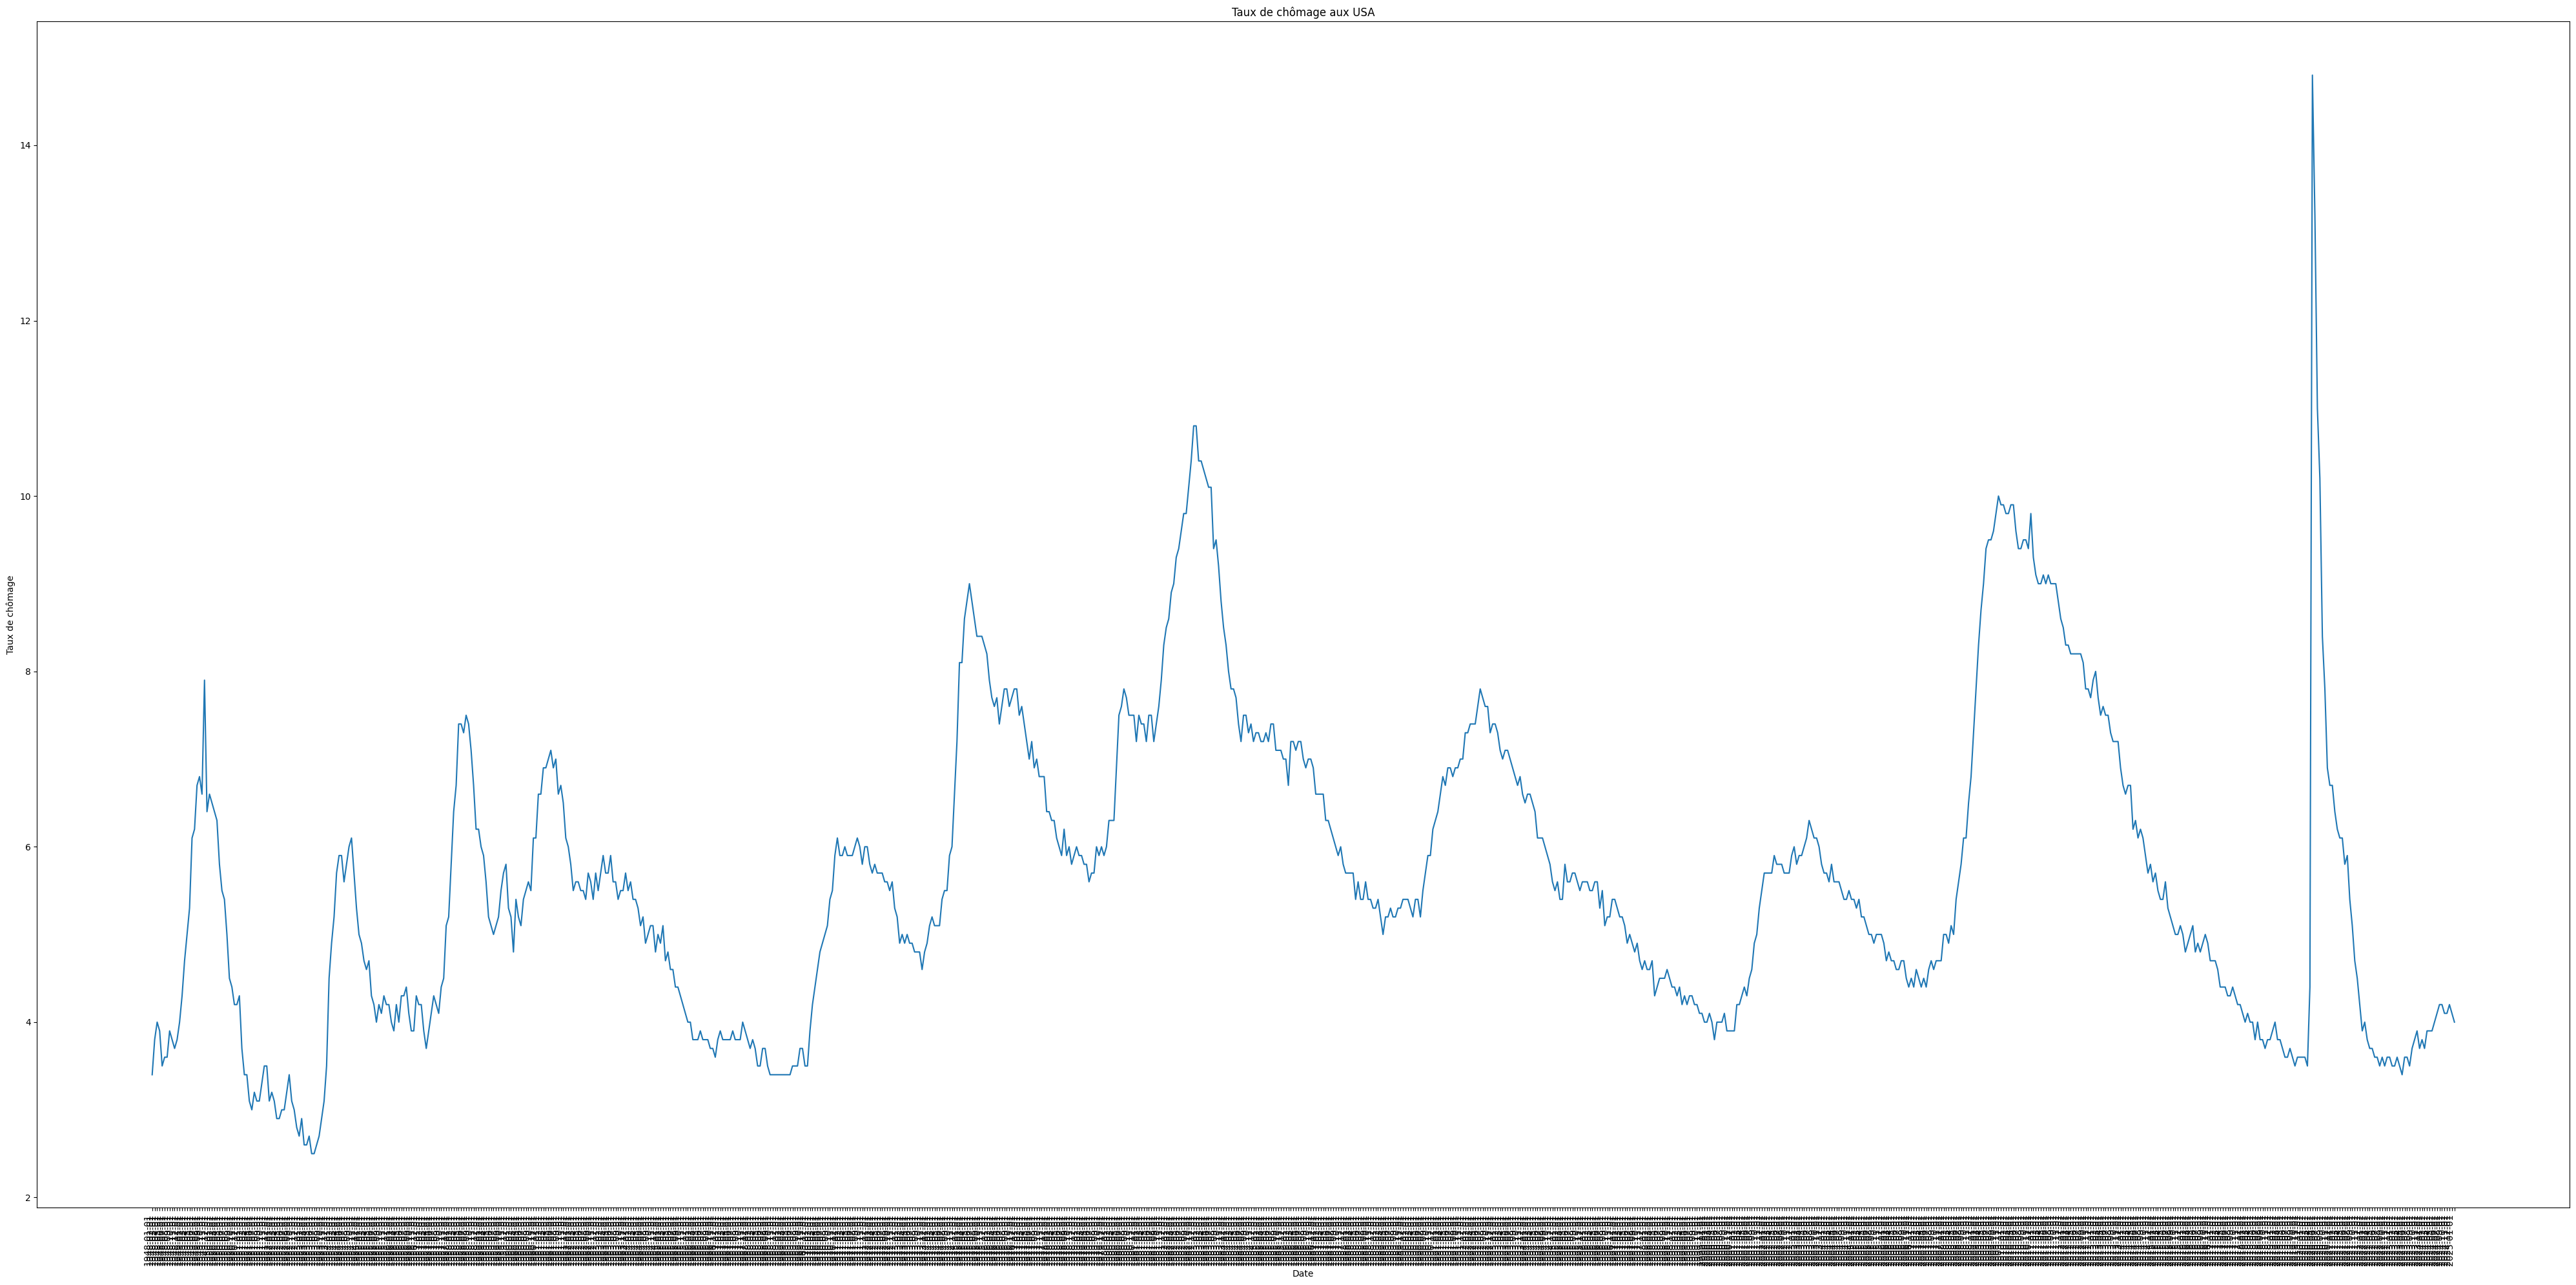

In [3]:
plt.figure(figsize=(40, 20))
sns.lineplot(data=chomage_usa, x='observation_date', y='UNRATE')
plt.title('Taux de chômage aux USA')
plt.xlabel('Date')
plt.xticks(rotation=90,ha='right')
plt.ylabel('Taux de chômage')
plt.tight_layout()
plt.show()

In [4]:
chomage_usa.describe()

,UNRATE
count,925.000000
mean,5.681622
std,1.708949
min,2.500000
25%,4.400000
50%,5.500000
75%,6.700000
max,14.800000


In [5]:
chomage_usa['observation_date'] = pd.to_datetime(chomage_usa['observation_date'])
chomage_usa.drop_duplicates()
chomage_usa.info()
chomage_usa['date_num'] = (chomage_usa['observation_date'] - chomage_usa['observation_date'].min()).dt.days
chomage_usa.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  925 non-null    datetime64[ns]
 1   UNRATE            925 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.6 KB


,observation_date,UNRATE,date_num
0,1948-01-01,3.4,0
1,1948-02-01,3.8,31
2,1948-03-01,4.0,60
3,1948-04-01,3.9,91
4,1948-05-01,3.5,121


# ***Regression Polynomiale***

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with

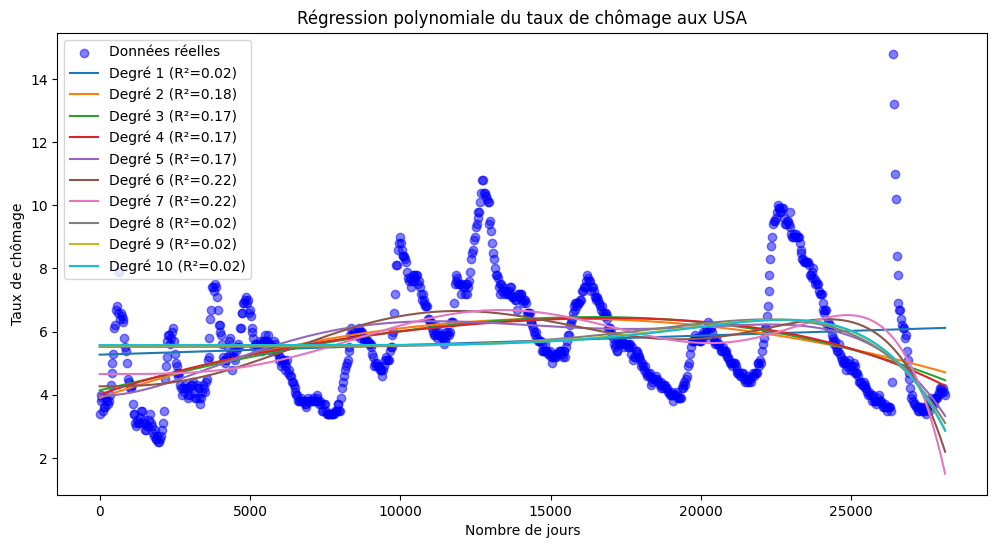

Scores R² pour différents degrés de régression :
Degré 1: R² = 0.0228
Degré 2: R² = 0.1766
Degré 3: R² = 0.1723
Degré 4: R² = 0.1653
Degré 5: R² = 0.1745
Degré 6: R² = 0.2179
Degré 7: R² = 0.2160
Degré 8: R² = 0.0238
Degré 9: R² = 0.0182
Degré 10: R² = 0.0163


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



X = chomage_usa[['date_num']]
y = chomage_usa['UNRATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
scores = {}

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='b', alpha=0.5, label='Données réelles')

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    score = r2_score(y_test, y_pred)
    scores[d] = score

    X_sorted = np.sort(X.values, axis=0)
    X_poly_sorted = poly.transform(X_sorted)
    y_poly_pred = model.predict(X_poly_sorted)
    plt.plot(X_sorted, y_poly_pred, label=f'Degré {d} (R²={score:.2f})')

plt.xlabel('Nombre de jours')
plt.ylabel('Taux de chômage')
plt.legend()
plt.title('Régression polynomiale du taux de chômage aux USA')
plt.show()

print("Scores R² pour différents degrés de régression :")
for d, score in scores.items():
    print(f"Degré {d}: R² = {score:.4f}")

# ***Analyse Serie chronologique***

In [7]:
# %pip install statsmodels
import statsmodels.api as sm

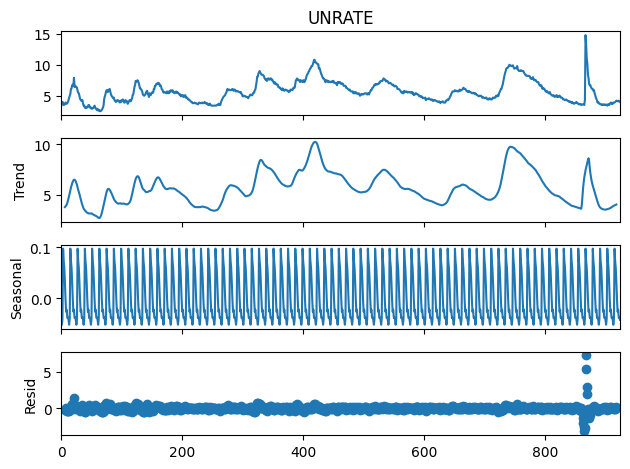

In [8]:
decomp = sm.tsa.seasonal_decompose(chomage_usa['UNRATE'], model='additive', period=12)

fig = decomp.plot()


plt.show()

# ***Prophet***

In [9]:
#!pip install prophet

16:14:15 - cmdstanpy - INFO - Chain [1] start processing
16:14:15 - cmdstanpy - INFO - Chain [1] done processing


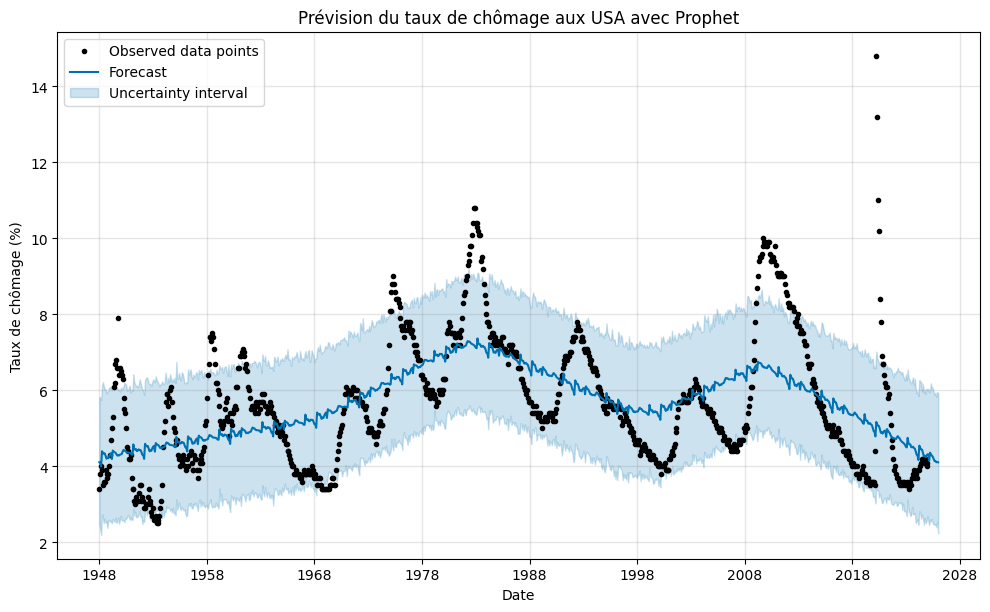

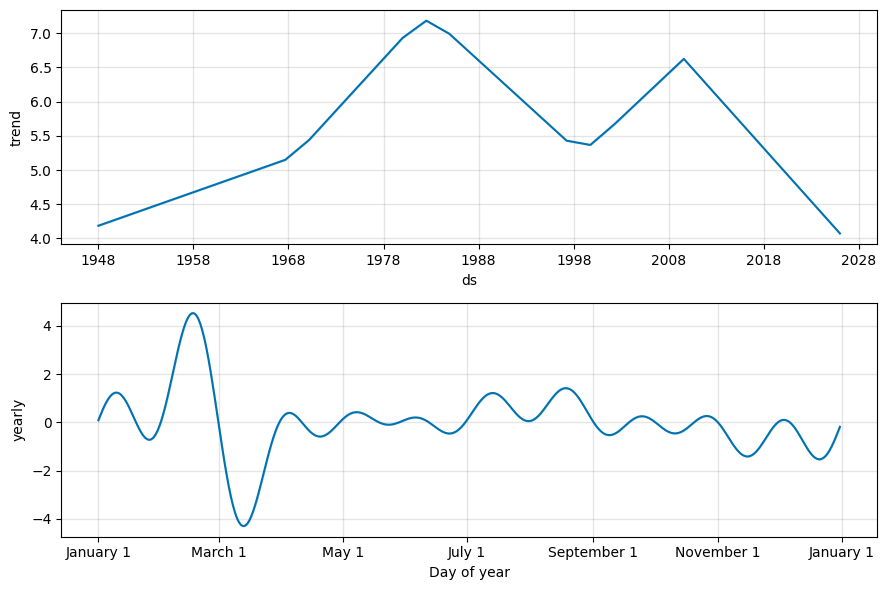

In [27]:
from prophet import Prophet
# Préparer les données pour Prophet (format ds, y)
df = chomage_usa[['observation_date', 'UNRATE']].rename(columns={'observation_date': 'ds', 'UNRATE': 'y'})

# Créer et entraîner le modèle Prophet
model = Prophet()
model.fit(df)

# Générer un dataframe pour les prévisions (ajout de nouvelles dates)
future = model.make_future_dataframe(periods=12, freq='MS')  # Prévision sur 1 an
forecast = model.predict(future)

# Affichage des résultats
fig = model.plot(forecast, include_legend=True)
plt.title("Prévision du taux de chômage aux USA avec Prophet")
plt.xlabel("Date")
plt.ylabel("Taux de chômage (%)")
plt.show()

# Afficher les composantes de la prévision (tendance, saisonnalités)
fig2 = model.plot_components(forecast)
plt.show()

In [29]:
forecast.tail(24)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
913,2024-02-01,4.371601,2.605782,5.969862,4.371601,4.371601,-0.089606,-0.089606,-0.089606,-0.089606,-0.089606,-0.089606,0.0,0.0,0.0,4.281995
914,2024-03-01,4.359262,2.460492,5.850350,4.359262,4.359262,-0.192351,-0.192351,-0.192351,-0.192351,-0.192351,-0.192351,0.0,0.0,0.0,4.166911
915,2024-04-01,4.346072,2.814996,6.273923,4.346072,4.346072,0.199623,0.199623,0.199623,0.199623,0.199623,0.199623,0.0,0.0,0.0,4.545695
916,2024-05-01,4.333308,2.796515,6.216738,4.333308,4.333308,0.153788,0.153788,0.153788,0.153788,0.153788,0.153788,0.0,0.0,0.0,4.487096
917,2024-06-01,4.320118,2.621318,6.228771,4.320118,4.320118,0.124331,0.124331,0.124331,0.124331,0.124331,0.124331,0.0,0.0,0.0,4.444449
918,2024-07-01,4.307353,2.728880,5.976024,4.307353,4.307353,0.131273,0.131273,0.131273,0.131273,0.131273,0.131273,0.0,0.0,0.0,4.438627
919,2024-08-01,4.294163,2.641946,6.175313,4.294163,4.294163,0.062263,0.062263,0.062263,0.062263,0.062263,0.062263,0.0,0.0,0.0,4.356426
920,2024-09-01,4.280973,2.460168,5.935446,4.280973,4.280973,-0.017400,-0.017400,-0.017400,-0.017400,-0.017400,-0.017400,0.0,0.0,0.0,4.263574
921,2024-10-01,4.268209,2.647122,6.017410,4.268209,4.268209,0.010897,0.010897,0.010897,0.010897,0.010897,0.010897,0.0,0.0,0.0,4.279106
922,2024-11-01,4.255019,2.504559,5.904139,4.255019,4.255019,-0.013753,-0.013753,-0.013753,-0.013753,-0.013753,-0.013753,0.0,0.0,0.0,4.241266


In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
# Get actual and predicted values
y_true = df['y']  # Real unemployment rate
y_pred = forecast['yhat'].iloc[:len(df)]  # Sélection propre des prédictions


# Compute metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Print results
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.3711
MAE: 1.0510
RMSE: 1.3545


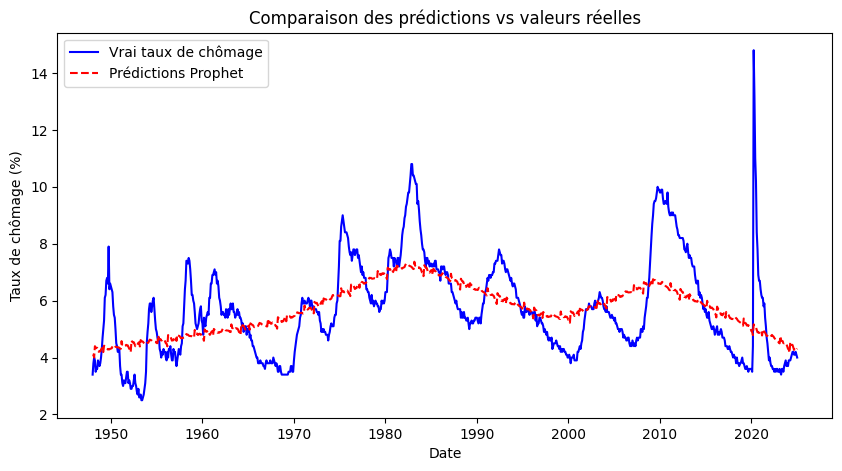

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['ds'], y_true, label='Vrai taux de chômage', color='blue')
plt.plot(df['ds'], y_pred, label='Prédictions Prophet', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Taux de chômage (%)')
plt.legend()
plt.title('Comparaison des prédictions vs valeurs réelles')
plt.show()


# ***ARIMA***

In [14]:
from statsmodels.tsa.stattools import adfuller


def adf_test(ts):
    result = adfuller(ts)
    print("p-value:", result[1])

    if result[1] < 0.05:
        print("=> The series is stationary (reject H0)")
    else:
        print("=> The series is non-stationary (fail to reject H0)")
        
adf_test(df['y'])


p-value: 0.00196613652874105
=> The series is stationary (reject H0)


In [15]:
#! pip install pmdarima

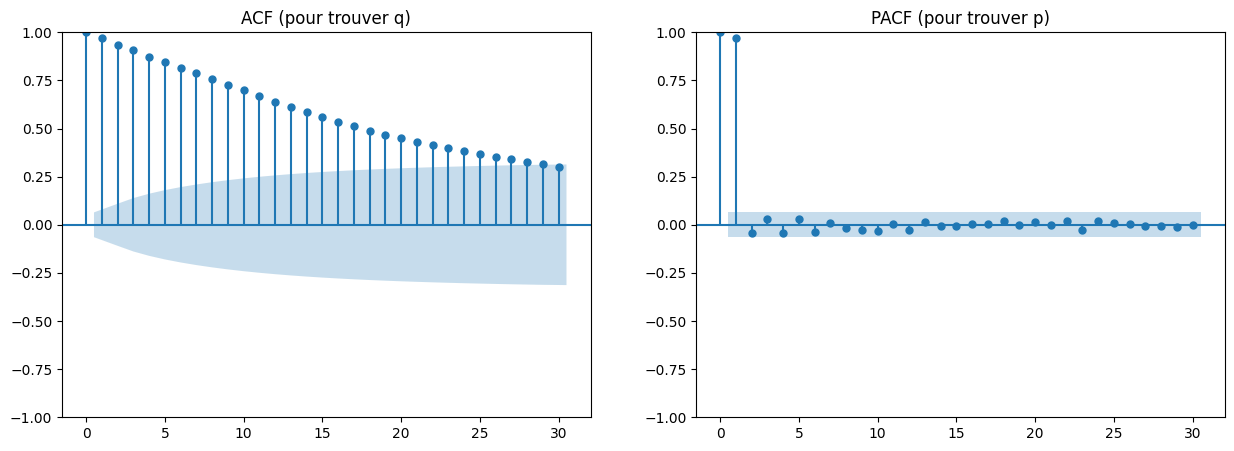

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1006.735, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1007.514, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1007.399, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1004.737, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1003.775, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1005.509, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1005.515, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1007.428, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1007.839, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1001.777, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1005.401, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1005.516, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1003.512, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

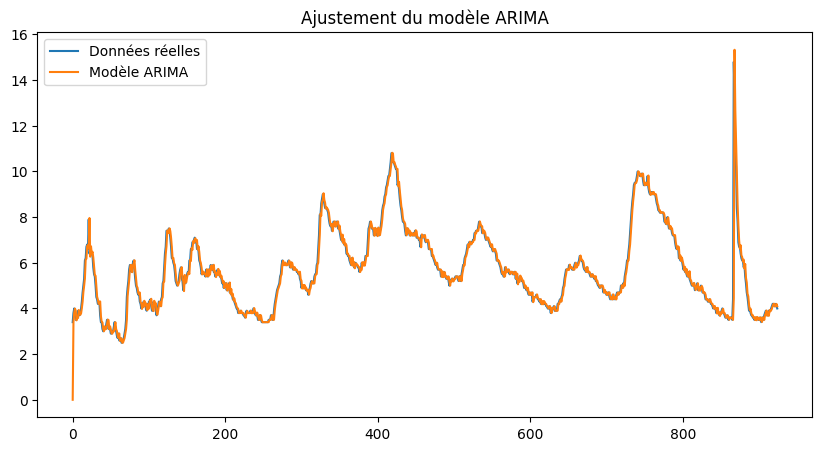

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima  # Pour trouver (p,d,q) automatiquement



# 🔹 Tracer ACF et PACF pour choisir p et q
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(df['y'].dropna(), ax=axes[0])
axes[0].set_title("ACF (pour trouver q)")
plot_pacf(df['y'].dropna(), ax=axes[1])
axes[1].set_title("PACF (pour trouver p)")
plt.show()

# 🔹 Trouver automatiquement (p, d, q)
auto_model = auto_arima(df['y'], seasonal=False, trace=True, stepwise=True)
print(auto_model.summary())

# 🔹 Ajuster le modèle ARIMA optimal
p, d, q = auto_model.order
model = sm.tsa.ARIMA(df['y'], order=(p, d, q))
results = model.fit()
print(results.summary())

# 🔹 Prédiction et visualisation
df['prévision'] = results.fittedvalues
plt.figure(figsize=(10,5))
plt.plot(df['y'], label="Données réelles")
plt.plot(df['prévision'], label="Modèle ARIMA")
plt.title("Ajustement du modèle ARIMA")
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_real = df['y'].iloc[d:]  # Ignorer les premières valeurs différenciées
y_pred = results.fittedvalues.iloc[d:]

# 🔹 Calcul des métriques
mae = mean_absolute_error(y_real, y_pred)
rmse = np.sqrt(mean_squared_error(y_real, y_pred))
mape = np.mean(np.abs((y_real - y_pred) / y_real)) * 100

# 🔹 Affichage des résultats
print(f"📉 MAE (Erreur Absolue Moyenne) : {mae:.3f}")
print(f"📉 RMSE (Racine de l'Erreur Quadratique Moyenne) : {rmse:.3f}")
print(f"📉 MAPE (Erreur Moyenne en %) : {mape:.2f}%")

📉 MAE (Erreur Absolue Moyenne) : 0.167
📉 RMSE (Racine de l'Erreur Quadratique Moyenne) : 0.415
📉 MAPE (Erreur Moyenne en %) : 2.89%


In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y_real, y_pred)
print(f"📊 R² Score : {r2:.3f}")


📊 R² Score : 0.941


# ***SARIMA***

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1009.548, Time=3.00 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1006.735, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1008.749, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1008.586, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1004.737, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1007.969, Time=0.31 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1007.920, Time=0.19 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1008.512, Time=0.95 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1007.514, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1007.399, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1003.775, Time=0.41 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1005.224, Time=0.83 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1005.191, Time=0.85 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1006.069, Time=1.61 sec
 ARIMA(2,1,1)(0,0,0

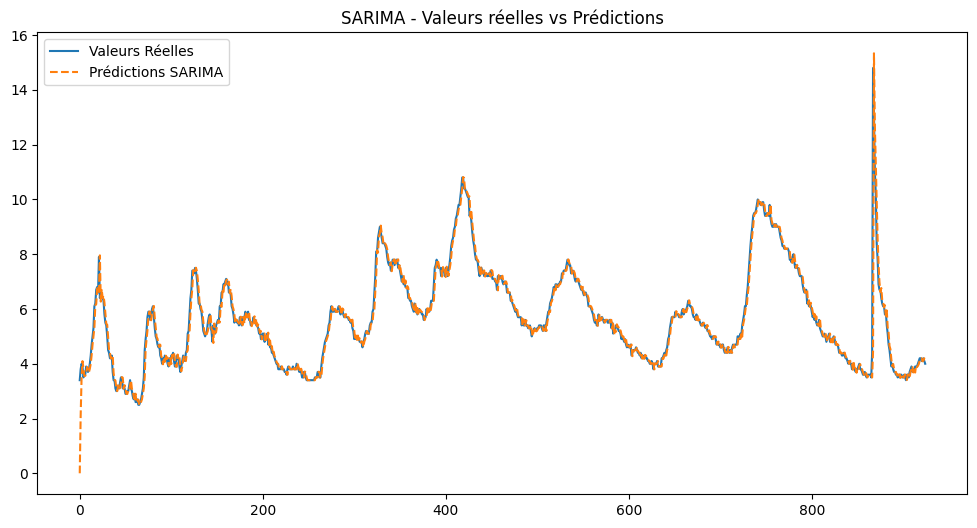

In [19]:
auto_model = auto_arima(df['y'], seasonal=True, m=12, stepwise=True, trace=True)
print(auto_model.summary())

p, d, q = auto_model.order
P, D, Q, s = auto_model.seasonal_order

sarima_model = sm.tsa.SARIMAX(df['y'], order=(p, d, q), 
                              seasonal_order=(P, D, Q, s), 
                              enforce_stationarity=False, enforce_invertibility=False)

sarima_results = sarima_model.fit()
print(sarima_results.summary())

df['SARIMA_Pred'] = sarima_results.fittedvalues

mae = mean_absolute_error(df['y'].iloc[d:], df['SARIMA_Pred'].iloc[d:])
rmse = np.sqrt(mean_squared_error(df['y'].iloc[d:], df['SARIMA_Pred'].iloc[d:]))
r2 = r2_score(df['y'].iloc[d:], df['SARIMA_Pred'].iloc[d:])

print(f"📉 MAE SARIMA : {mae:.3f}")
print(f"📉 RMSE SARIMA : {rmse:.3f}")
print(f"📊 R² SARIMA : {r2:.3f}")

plt.figure(figsize=(12,6))
plt.plot(df['y'], label='Valeurs Réelles')
plt.plot(df['SARIMA_Pred'], label='Prédictions SARIMA', linestyle='dashed')
plt.legend()
plt.title("SARIMA - Valeurs réelles vs Prédictions")
plt.show()
